# Trabalho 1 de Mineração de Dados
### Equipe:
#### Daniel Rebouças de Queiroz - 421751
#### Pedro Ernesto de Oliveira Primo - 418465

In [1]:
!pip install plotly
!pip install ipython

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import floor

O cinema é parte importante da vida de grande parte da população. Quem não está com saudades de ir a uma sala de cinema e por cerca de 2 horas, esquecer dos problemas mundanos enquanto está imerso num mundo completamente diferente, projetado numa tela gigante à sua frente, comendo uma pipoquinha (ou um chocolate comprado nas Lojas Americanas)?


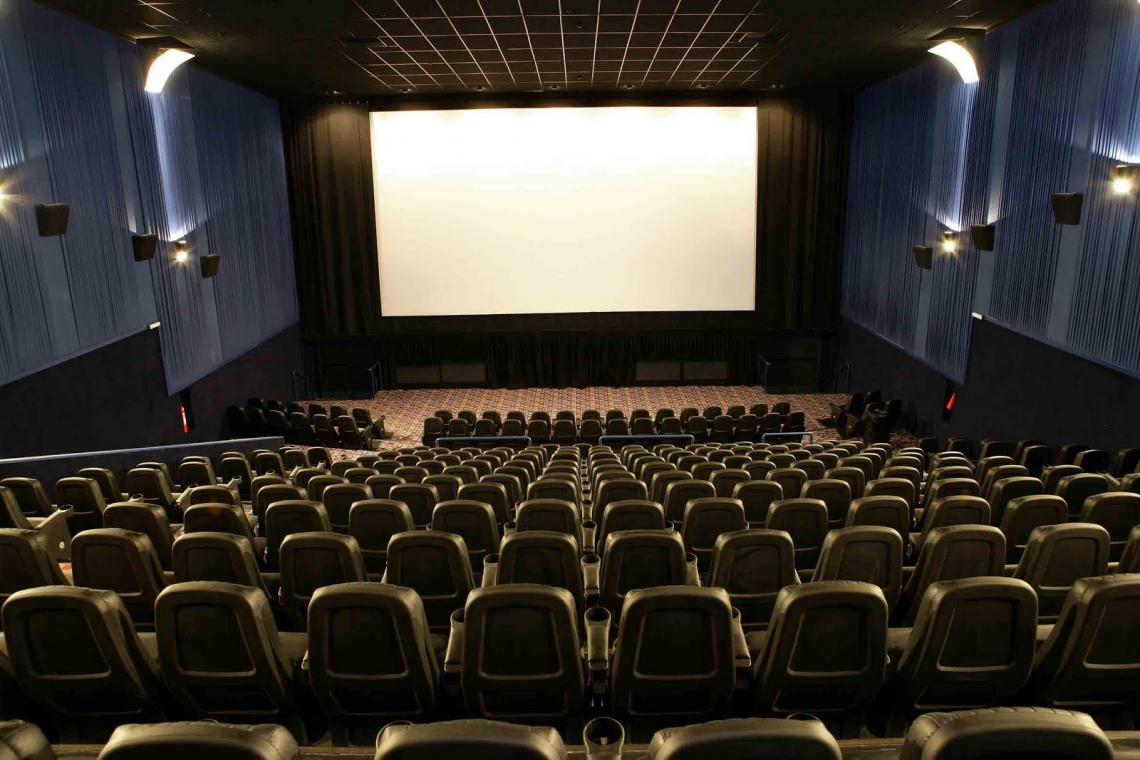

In [3]:
Image("imgs/cinema.jpg")

O cinema também é parte fundamental da cultura de um país, pois muitas vezes traz elementos culturais específicos de um país, o que pode causar estranheza em telespectadores de outras localidades, como expressões e piadas, os quais são muitas vezes adaptados na dublagem.

No filme Tá Dando Onda, por exemplo, temos o personagem João Frango, originalmente natural de Sheboygan, Wisconsin, EUA. No Brasil, porém, sua localidade foi adaptada, a fim de gerar mais humor ao público brasileiro, o que proporcionou uma das melhores cenas, mostrada abaixo:

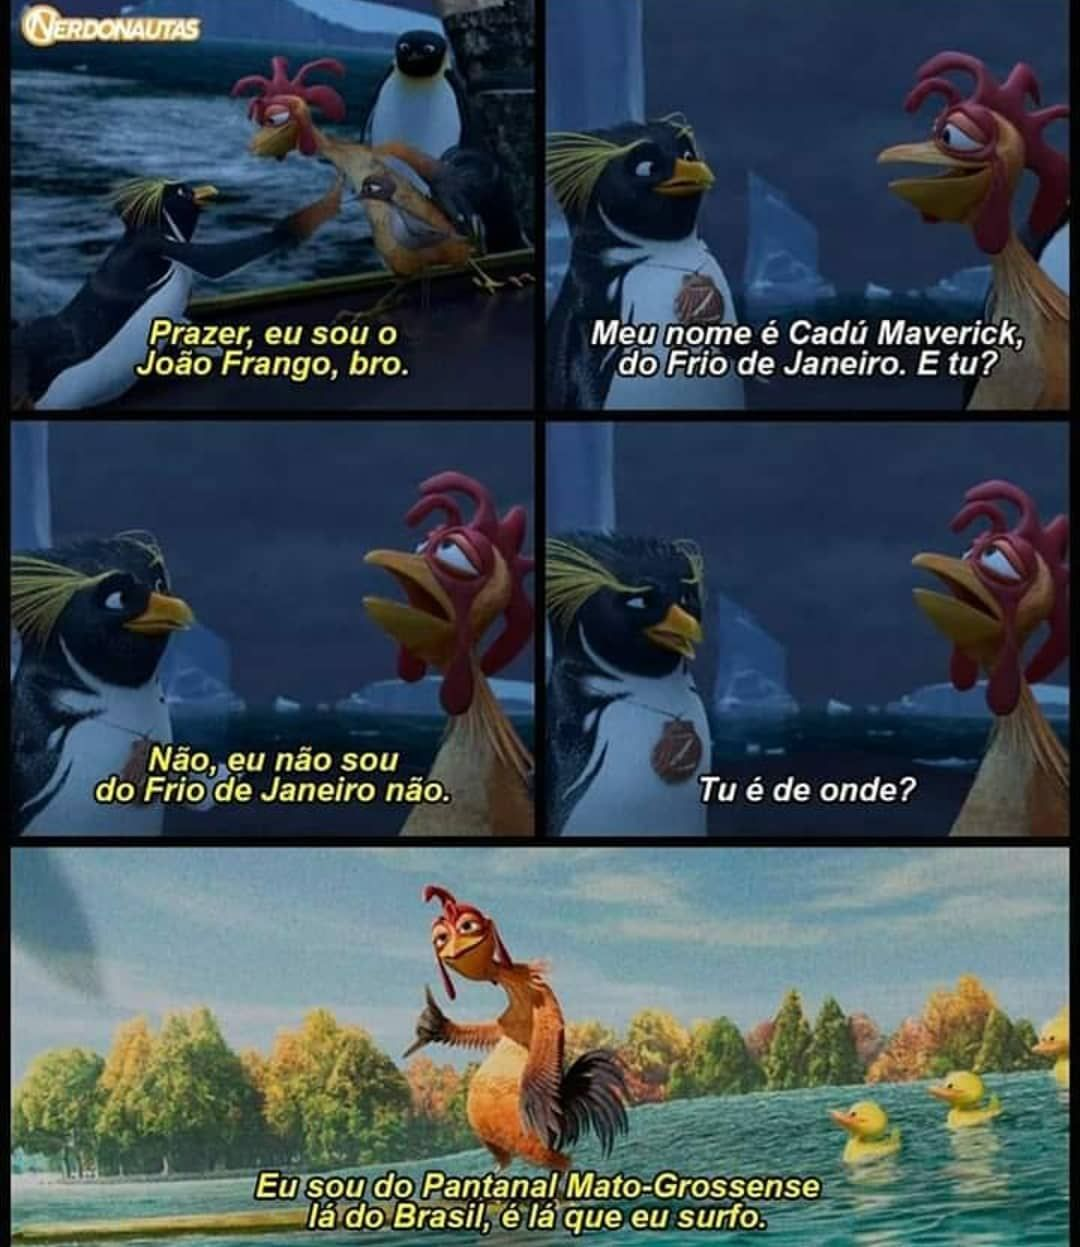

In [4]:
Image("imgs/ta_dando_onda.jpg")

Durante esse trabalho, usaremos uma base de dados retirada do site IMDb e disponibilizada no kaggle, por meio do link https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset. Usando essa base de dados, faremos as seguintes análises:
##### 1. Análise dos votantes por gênero e faixa etária
##### 2. Filmes mais bem avaliados
##### 3. Produtoras mais bem avaliadas
##### 4. Gêneros mais bem avaliados
##### 5. Diretores mais bem avaliados
##### 6. Quantidade de filmes produzidos ao longo dos anos por país
##### 7. Duração e Nota Média dos filmes ao longo do tempo 

## Importação de Dataset de Filmes e de Avaliações

In [5]:
movies_df = pd.read_csv('Movies/IMDb movies.csv', low_memory=False)

In [6]:
ratings_df = pd.read_csv('Movies/IMDb ratings.csv')

## Limpeza dos Dados

### Dataset Filmes

No dataset de filmes, existe o campo "Year", que contém os anos de lançamento dos filmes. Existe uma amostra, porém, que não segue esse padrão, como mostrado abaixo

In [7]:
for year in movies_df.year:
    if len(year.split()) > 1:
        print(year)

TV Movie 2019


In [8]:
movies_df.loc[movies_df.year == 'TV Movie 2019']

imdb_title_id          title original_title           year  \
83917     tt8206668  Bad Education  Bad Education  TV Movie 2019   

      date_published                     genre  duration country language  \
83917  TV Movie 2019  Biography, Comedy, Crime       108     USA  English   

          director  ...                                             actors  \
83917  Cory Finley  ...  Hugh Jackman, Ray Romano, Welker White, Alliso...   

                                             description avg_vote  votes  \
83917  The beloved superintendent of New York's Rosly...      7.1  23973   

       budget  usa_gross_income worlwide_gross_income metascore  \
83917     NaN               NaN                   NaN      79.0   

      reviews_from_users  reviews_from_critics  
83917              135.0                  98.0  

[1 rows x 22 columns]

Para resolver o problema, substituiremos esse campo pelo ano correspondente, ou seja, 2019.

In [9]:
movies_df.loc[movies_df.year == 'TV Movie 2019', ['year']] = '2019'

#### Remoção Colunas

O dataset possui algumas colunas que não serão utilizadas nas análises, assim, serão removidas, por possuir muitos dados faltantes ou por serem redundantes

In [10]:
movies_df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [11]:
movies_df.drop(columns=(['title', 'language', 'writer', 'actors', 'date_published'] 
                        + list(movies_df.columns[13:])), inplace=True)

### Dataset Avaliações

#### Remoção Colunas

Também removemos as colunas do dataset de avaliações que não serão utilizadas nas análises

In [12]:
ratings_df.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [13]:
drop_columns = ( ['imdb_title_id', 'weighted_average_vote', 'median_vote']
                + list(ratings_df.columns[5:15]) + list(ratings_df.columns[15:24:2])
                + list(ratings_df.columns[25:34])
                + list(ratings_df.columns[35:]) )

In [14]:
ratings_df.drop(columns=drop_columns, inplace=True)

Algumas colunas possuem valores nan, correspondendo ao fato de que nenhuma pessoa que atende ao critério da coluna ter dado nota ao filme. Dessa forma, substituiremos esses valores por 0.

In [15]:
ratings_df.fillna(0, inplace=True)

Concatenando os dois datasets em apenas um

In [16]:
rated_movies_df = pd.concat([movies_df, ratings_df], axis=1, 
                     verify_integrity=True)
rated_movies_df.shape

(85855, 16)

Ao analisar a média e a mediana, nota-se que a mediana é 484 e a média é 9493,5. Isso quer dizer que metade das amostras possuem até 484 votos, mas pela média, nota-se que há filmes com muito mais votos que 514. Decidimos, então, adotar os 20% dos filmes mais votados, correspondente ao 4º quintil, igual a 2722 votos, para as análises que utilizamos as notas médias.

In [17]:
median = rated_movies_df['total_votes'].median()
mean = rated_movies_df['total_votes'].mean()
fourth_quintile = rated_movies_df['total_votes'].quantile(0.8)
median, mean, fourth_quintile

(484.0, 9493.489604565837, 2722.0)

In [18]:
movies_total_votes_df = rated_movies_df[rated_movies_df.total_votes >= fourth_quintile]

## Analise dos Dados

### Funções Auxiliares

As duas funções abaixo foram desenvolvidas para auxiliar em certas análises.
A função feature_mean_vote tem como objetivo retornar a nota média dos filmes baseando-se em uma feature dada. 
#### Descrição dos parâmetros:
##### 1. feature - atributo a se basear
##### 2. dataframe - dataset a ser utilizado
##### 3. threshold_movies - quantidade minima de filmes para entrar na classificação
##### 4. plot - caso True, plota o gráfico de barras horizontais; caso False, retorna o dataframe gerado
##### 5. ranking - quantas amostras serão mostradas no grafico de barras horizontais
##### 6. mult_tuple - tupla com as colunas de total de votos e média dos votos referidos
##### 7. by_total - caso True, mult_tuple será desconsiderado; caso False, utilizará a tupla passada como argumento

In [19]:
def feature_mean_vote(feature, dataframe=movies_total_votes_df, threshold_movies=10, 
                      plot=True, ranking=5):
    movies_by_feature = dataframe[feature].copy()
    feature_dict = {}
    for feat in movies_by_feature.value_counts().index:
        if movies_by_feature.value_counts()[feat] > threshold_movies:
            feature_df = dataframe[movies_by_feature == feat]
            feature_rate = feature_df.loc[:,'total_votes':'mean_vote'].product(axis=1).sum()
            feature_total_votes = feature_df.total_votes.sum()   
            
            feature_dict[feat] = round((feature_rate / feature_total_votes), 1)
            
    final_df = pd.DataFrame.from_dict(feature_dict, orient='index', 
                                      columns=['Nota Media']).sort_values(
        'Nota Media', ascending=False).reset_index()
    
    final_df.columns = [feature, 'Nota Media']
    if plot:
        fig = px.bar(final_df[:ranking], x='Nota Media',y=feature , orientation='h', text='Nota Media', height=300, width=800);
        fig.show()
    else: 
        return final_df

A função separate_multiples tem como objetivo separar possíveis atributos que possam conter uma lista de valores, como Gênero e País de Produção. Para isso, ele separa os filmes que possuem mais de 1 valor em certo atributo e cria novas linhas com apenas 1 valor ('USA, France' se torna 'USA' e 'France').
#### Descrição dos parâmetros:
##### 1. feature - atributo com mais de 1 valor em uma amostra
##### 2. dataframe - dataset a ser utilizado

In [20]:
def separate_multiples(feature, dataframe):
    new_rows = []
    final_df = dataframe.copy()
    
    for index, row in final_df.iterrows():
        if len(row[feature].split(",")) > 1:
            feature_values = final_df.loc[index, feature].split(",")        
            final_df.drop(index, inplace=True)

            for i in range (len(feature_values)):
                new_row = row
                new_row[feature] = feature_values[i].strip()
                new_rows.append(new_row.to_list())
                
    new_rows = pd.DataFrame(new_rows, columns=dataframe.columns)
    return pd.concat([final_df, new_rows], ignore_index=True)

### 1. Votantes por sexo e faixa etária

#### 1.a. Sexo

In [21]:
gender_allages_df = rated_movies_df[['males_allages_votes', 'females_allages_votes']]
gender_allages_df.columns = ['Masculino', 'Feminino']
gender_allages_df = gender_allages_df.sum().reset_index()
gender_allages_df.columns = ['Sexo', 'Votantes']

In [22]:
fig = px.pie(gender_allages_df, values='Votantes', names='Sexo', title='Votantes por Sexo')
fig.show()

Pelo gráfico acima, percebe-se a predominância do gênero masculino entre os votantes 

#### 1.b. Faixa etária

In [23]:
ages_allgender_columns = rated_movies_df.columns[10:14].to_list()
ages_allgender_df = rated_movies_df[ages_allgender_columns]
ages_allgender_df.columns = ['-18', '18-29', '30-44', '45+']
ages_allgender_df = ages_allgender_df.sum().reset_index()
ages_allgender_df.columns = ['Faixa Etária', 'Votantes']

In [24]:
fig = px.pie(ages_allgender_df, values='Votantes', names='Faixa Etária', 
             title='Votantes por Faixa Etária')
fig.show()

Pelo gráfico acima, nota-se que a maior parte das pessoas que votaram estão na faixa de 30 a 44 anos, enquanto pessoas com menos de 18 aanos quase não votaram (ou votaram com a conta dos pais)

### 2. Filmes mais bem avaliados

####  Geral

In [25]:
general_best_movies = movies_total_votes_df.sort_values('mean_vote', ascending=False)
fig = px.bar(general_best_movies[:5], y = 'original_title', x = 'mean_vote', orientation='h', text='mean_vote',height=300, width=800);
fig.show()

O gráfico acima mostra os filmes que obtiveram as maiores notas médias de todo o mundo. Percebe-se que os filmes mais bem avaliados são compostos por muito filmes indianos e turcos, isso deve acontecer pois esses dois países são grandes consumidores e apoiadores do cinema local.

#### EUA

In [26]:
country_notna_df = movies_total_votes_df[movies_total_votes_df.country.notna()]
country_votes_df = separate_multiples('country', country_notna_df)

In [27]:
usa_best_movies = country_votes_df[country_votes_df.country == 'USA'].sort_values('mean_vote', ascending=False)
fig = px.bar(usa_best_movies[:5], y = 'original_title', x = 'mean_vote', orientation='h', text='mean_vote',height=300, width=800);
fig.show()

O gráfico acima mostra os filmes americanos que obtiveram as maiores notas médias

#### Brasil

In [28]:
brazil_best_movies = country_votes_df[country_votes_df.country == 'Brazil'].sort_values('mean_vote', ascending=False)
fig = px.bar(brazil_best_movies[:5], y = 'original_title', x = 'mean_vote', orientation='h', text='mean_vote',height=300, width=800);
fig.show()

O gráfico acima mostra os filmes brasileiros que obtiveram as maiores notas médias

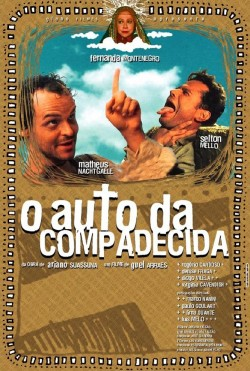

In [29]:
Image('imgs/O_auto_da_compadecida.jpg')

### 3. Produtoras mais bem avaliadas

Removendo as amostras onde a produtora não foi especificada

In [30]:
companies_df = movies_total_votes_df[movies_total_votes_df.production_company.notna()]

In [31]:
feature_mean_vote('production_company', dataframe=companies_df, 
                  threshold_movies=50)

O gráfico acima mostra as produtoras mais bem avaliadas. Nota-se que algumas delas possuem filmes que suas avaliações estão entre as 10 melhores, como a Castle Rock Entertainment com o filme The Shawnshank Redemption

### 4. Gêneros mais bem avaliados

In [32]:
movies_total_votes_df[movies_total_votes_df.genre.isna()]

Empty DataFrame
Columns: [imdb_title_id, original_title, year, genre, duration, country, director, production_company, total_votes, mean_vote, allgenders_0age_votes, allgenders_18age_votes, allgenders_30age_votes, allgenders_45age_votes, males_allages_votes, females_allages_votes]
Index: []

In [33]:
feature_mean_vote('genre', threshold_movies=50)

O gráfico acima mostra os os gêneros específicos mais bem avaliados.

In [34]:
genre_df = separate_multiples('genre', movies_total_votes_df)

In [35]:
feature_mean_vote('genre', dataframe=genre_df, threshold_movies=300)

Já o gráfico acima, mostra as melhores avaliações dos gêneros "puros". Note que no gráfico anterior, o gênero drama era incluido na classificação de muito filmes, pois mesmo que um filme tenha o gênero War (guerra) ele também pode ser um drama, o que pode influenciar na nota média.

### 5. Diretores mais bem avaliados

In [36]:
movies_total_votes_df[movies_total_votes_df.director.isna()]

Empty DataFrame
Columns: [imdb_title_id, original_title, year, genre, duration, country, director, production_company, total_votes, mean_vote, allgenders_0age_votes, allgenders_18age_votes, allgenders_30age_votes, allgenders_45age_votes, males_allages_votes, females_allages_votes]
Index: []

In [37]:
feature_mean_vote('director', threshold_movies=10)

O gráfico acima mostra os diretores mais bem avaliados. Veja que fazem parte diretores de grandes clássicos como Senhor dos Anéis (Peter Jackson) e Batman: O cavaleiro das trevas (Christopher Nolan), que tambem fazem parte do gráfico de filmes mais bem avaliados nos Estados Unidos.

### 6. Produção de filmes por país ao longo do tempo

In [38]:
country_notna_df = rated_movies_df[rated_movies_df.country.notna()]
country_df = separate_multiples('country', country_notna_df)

In [39]:
movies_by_country = country_df.groupby(['country', 'year']).count()
movies_by_country.reset_index(inplace=True)
movies_by_country = movies_by_country.sort_values(
    ['year', 'country'], ignore_index=True).loc[:, 'country':'imdb_title_id']
movies_by_country.columns = ['country', 'year', 'number_movies']

In [40]:
fig = px.scatter_geo(movies_by_country, locations="country", hover_name="country", 
                     size="number_movies", animation_frame="year", 
                     projection="natural earth", locationmode='country names', 
                     width=880, height=700)
fig.show()

O mapa acima mostra a produção de filmes por país ao longo dos anos. Percebe-se que os Estados Unidos sempre foi o maior produtor de filmes, seguido por Reino Unido, França, Alemanha e India e que mesmo com uma alta produção de filmes e de grande qualidade, a India e Turquia ainda permanecem no topo dos filmes mais bem avaliados devido as grandes produtoras como Bollywood e do imenso apoio ao cinema local, como dito anteriormente.

### 7. Duração e Nota Média dos filmes ao longo do tempo

In [41]:
year_df = feature_mean_vote('year', rated_movies_df, threshold_movies=0, plot=False).sort_values('year')
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Duração dos filmes ao longo do tempo", "Nota media dos filmes por ano"))

fig.add_trace(
    go.Scatter(x=rated_movies_df.groupby('year').mean().reset_index()['year'], y = rated_movies_df.groupby('year').mean().reset_index()['duration'], name='Duração'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=year_df['year'], y= year_df['Nota Media'], name='Nota Média'),
    row=1, col=2
)

fig.update_layout(height=600, width=1700)
fig.show()

Os gráficos acima mostram a duração e a nota média dos filmes ao longo do tempo, respectivamente. Percebe-se que com o passar dos anos a duração dos filmes foi aumentando, isso pode estar relacionado com os recursos disponíveis e apreciação do público, já que entre 1894-1924 o capital à disposição da indústria cinematográfica não era o suficiente para filmes longos. 

Note também que a nota média dos filmes inicialmente foi crescendo, isso pode estar relacionado com o que foi mencionado anteriormente, como poucos filmes eram produzidos e a qualidade não eram das melhores as notas começaram baixas e foram aumentando com o passar do tempo. 

Entretanto, a partir de um certo ponto as notas começaram a decair. Isso pode estar relacionado com o fato de que as mais pessoas terem acesso à uma grande quantidade de filmes, e se tornarem mais críticas em relação à qualidade dos filmes. Outra relação possível seria a de Qualidade x Quantidade, como um número muito maior de filmes começaram a ser produzidos para suprir a necessidade do público, a qualidade começou a decair


Veja que a duração do filme não tem alta correlação com a nota média, como pode-se ver abaixo:

In [42]:
rated_movies_df[['duration', 'mean_vote']].corr()

duration  mean_vote
duration   1.000000   0.250778
mean_vote  0.250778   1.000000

In [43]:
fig = px.scatter(movies_total_votes_df, x='duration', y='mean_vote')
fig.show()

A partir do gráfico acima, nota-se que a duração dos filmes se concentra entre 50 e 200 minutos, como já era de se esperar, e que as notas se concentram na região entre 6 e 8.

Outra informamação que podemos tirar é que, apesar da baixa correlação entre duração e nota média, podemos notar que os filmes com duração muito alta, acia de 250 minutos, por exemplo, possuem notas razoavelmente altas, acima de 6. Isso pode ter relação com o fato de muitas vezes serem filmes considerados cult e que são assistidos, na maior parte do tempo, por amantes do cinema.